In [2]:
import pandas as pd
import matplotlib.pyplot as plt
true_df=pd.read_csv('../data/True.csv')
fake_df=pd.read_csv('../data/Fake.csv')

true_df['label']="REAL"
fake_df['label']="FAKE"

combined_df=pd.concat([true_df,fake_df]).reset_index(drop=True)


combined_df.to_csv('../data/combined.csv', index=False)

print("Combined file is saved in combined.csv")
print("Shape of the combined dataset:",combined_df.shape)
combined_df.head()


Combined file is saved in combined.csv
Shape of the combined dataset: (44898, 5)


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL


In [3]:
print(combined_df.isnull().sum())
print(combined_df['label'].value_counts())

title      0
text       0
subject    0
date       0
label      0
dtype: int64
label
FAKE    23481
REAL    21417
Name: count, dtype: int64


In [4]:
combined_df['text_length']=combined_df['text'].apply(len)

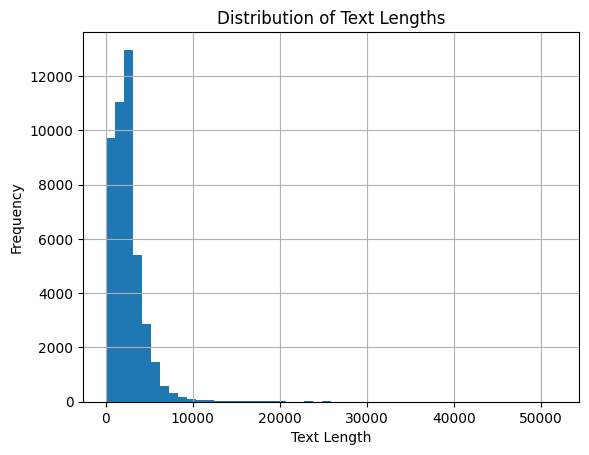

In [5]:
combined_df['text_length'].hist(bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [6]:
import re
import string

# Define a cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\[.*?\]', '', text)  # remove [text]
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'<.*?>+', '', text)  # remove HTML tags
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # remove punctuation
    text = re.sub(r'\n', ' ', text)  # remove line breaks
    text = re.sub(r'\w*\d\w*', '', text)  # remove words with digits
    return text

# Apply cleaning to all rows
combined_df['text_clean'] = combined_df['text'].apply(clean_text)

# Check result
print(combined_df[['text', 'text_clean']].head(3))


                                                text  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   

                                          text_clean  
0  washington reuters  the head of a conservative...  
1  washington reuters  transgender people will be...  
2  washington reuters  the special counsel invest...  


In [7]:
combined_df

,title,text,subject,date,label,text_length,text_clean
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",REAL,4659,washington reuters the head of a conservative...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",REAL,4077,washington reuters transgender people will be...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",REAL,2789,washington reuters the special counsel invest...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",REAL,2461,washington reuters trump campaign adviser geo...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",REAL,5204,seattlewashington reuters president donald tr...
...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",FAKE,3237,century wire says as reported earlier this w...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",FAKE,1684,century wire says it s a familiar theme whene...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",FAKE,25065,patrick henningsen century wireremember when...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",FAKE,2685,century wire says al jazeera america will go ...


In [8]:
combined_df=combined_df.drop(columns=['text'])

In [9]:
# Example: Drop 'title' and 'subject' too, if you don't need them
combined_df = combined_df.drop(columns=['title', 'subject', 'date'], errors='ignore')


In [10]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Fit and transform the 'label' column
combined_df['label_encoded'] = le.fit_transform(combined_df['label'])

# Check the mapping: which is 0, which is 1
print("Label mapping:")
for index, class_name in enumerate(le.classes_):
    print(f"{class_name} --> {index}")

# See first few rows to verify
print(combined_df[['label', 'label_encoded']].head())


Label mapping:
FAKE --> 0
REAL --> 1
  label  label_encoded
0  REAL              1
1  REAL              1
2  REAL              1
3  REAL              1
4  REAL              1


In [11]:
from sklearn.model_selection import train_test_split

# ✅ Features (X) and Labels (y)
X = combined_df['text_clean']
y = combined_df['label_encoded']

# ✅ Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps same proportion of FAKE/REAL in both sets
)

# ✅ Check sizes
print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Train set size: 35918
Test set size: 8980


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit on training text and transform both train and test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Check shape to confirm
print("TF-IDF Train shape:", X_train_tfidf.shape)
print("TF-IDF Test shape:", X_test_tfidf.shape)


TF-IDF Train shape: (35918, 179053)
TF-IDF Test shape: (8980, 179053)


Accuracy: 0.9846325167037862

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.98      0.98      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



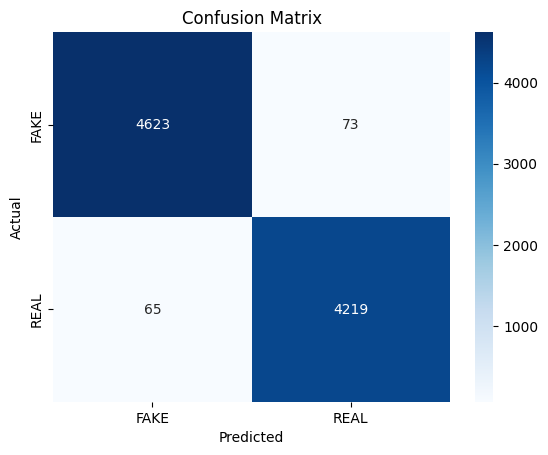

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ✅ Initialize the model
model = LogisticRegression(max_iter=1000)

# ✅ Train the model
model.fit(X_train_tfidf, y_train)

# ✅ Predict on test data
y_pred = model.predict(X_test_tfidf)

# ✅ Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


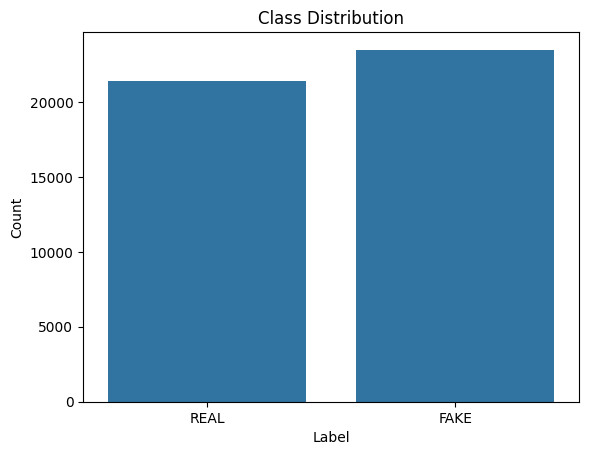

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=combined_df, x='label')
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [16]:
import joblib

# Suppose these are your variables after splitting & vectorizing
# X_train_tfidf, X_test_tfidf, y_train, y_test, vectorizer

import os

# Create folders if they don't exist
os.makedirs('../data', exist_ok=True)
os.makedirs('../model', exist_ok=True)


# ✅ Save them
joblib.dump(X_train_tfidf, '../data/X_train.pkl')
joblib.dump(X_test_tfidf, '../data/X_test.pkl')
joblib.dump(y_train, '../data/y_train.pkl')
joblib.dump(y_test, '../data/y_test.pkl')
joblib.dump(vectorizer, '../model/tfidf_vectorizer.pkl')

print("✅ Train/test splits and vectorizer saved successfully!")


✅ Train/test splits and vectorizer saved successfully!
